In [1]:
'''
Date: 2022.07.20
Title: 프로야구 선수의 다음 해 연봉 예측하기
By: Kang Jin Seong
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

picher_file_path = 'C:/Users/USER/DataAnalysis_jupyter/picher_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [2]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [3]:
print(picher.shape)

(152, 22)


In [4]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<AxesSubplot:>

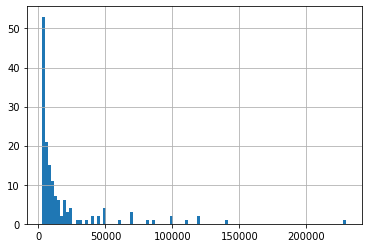

In [5]:
picher['연봉(2018)'].hist(bins = 100)    #2018년 연봉 분포를 출력합니다.

<AxesSubplot:>

C:\Users\USER\anaconda3\envs\pybook\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\envs\pybook\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


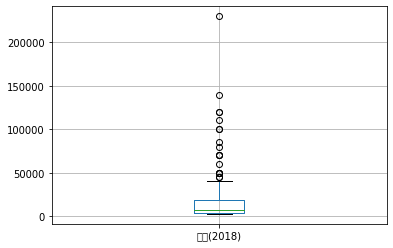

In [6]:
picher.boxplot(column = ['연봉(2018)'])    #연봉의 상자 그림을 출력합니다
# 히스토그램에서는 연봉의 분포를 파악할 수 있다.
# 상자 그림에서는 연봉의 일반적인 범주를 파악할 수 있다.

In [7]:
# matplotlib 기반의 시각화 툴을 이용할 때 한글 폰트를 사용하는 방법
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_fname = 'C:/Users/USER/anaconda3/envs/pybook/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

In [8]:
# mpl.rc('font', family = 'NanumGothicOTF')

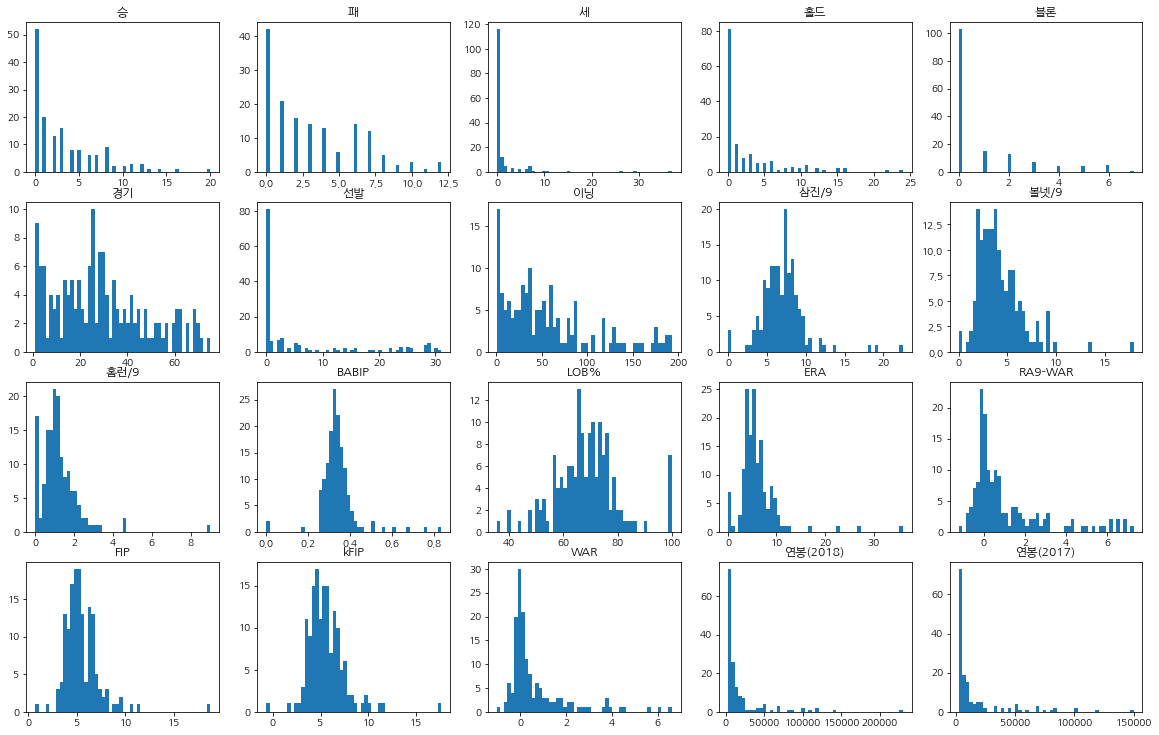

In [9]:
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]
# 피처 각각에 대한 histogram을 출력합니다.
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    # df의 column 갯수 만큼의 subplot을 출력합니다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()
    
plot_hist_each_column(picher_features_df)

In [10]:
'''예측 투수의 연봉 예측하기 '''
# pandas 형태로 정의된 데이터를 출력 할 때, scientific-notation이 아닌 float 모양으로 출력되게 해줍니다.
pd.options.mode.chained_assignment = None

# 피처 각각에 대한 scaling을 수행하는 함수를 정의합니다.
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

# 피처 각각에 대한 scaling을 수행합니다.
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']

picher_df = standard_scaling(picher, scale_columns)

picher_df = picher_df.rename(columns = {'연봉(2018)': 'y'})
picher_df.head(5)


,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [11]:
# 피처들의 단위 맞춰 주기: One-hot-encoding
# 팀명 피처를 one-hot-encoding으로 변환합니다.
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis = 1)
picher_df = picher_df.join(team_encoding)

team_encoding.head(5)

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [24]:
#회귀 분석을 위한 학습, 테스트 데이터셋 분리
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

#학습데이터와 테스트 데이터로 분리합니다.
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 19)

In [13]:
# 회귀 분석 계수 학습 & 학습된 계수 출력
# 회귀 분석 계수를 학습합니다.(회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 학습된 계수를 출력합니다.
print(lr.coef_)

[ -1481.01733901   -416.68736601 -94136.23649209  -1560.86205158
   1572.00472193   -747.04952389  -1375.53830289   -523.54687556
   3959.10653661    898.37638984  10272.48746451  77672.53804469
  -2434.38947427   -892.11801281    449.91117164   7612.15661812
   1271.04500059  -2810.5564514    5396.97279896  -4797.30275904
   -250.69773139    236.02530053  19130.59021357    854.02604585
   1301.61974637   3613.84063182   -935.07281796  18144.60099745]


In [14]:
picher_df.columns

Index(['선수명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', 'y',
       '연봉(2017)', 'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성', '한화'],
      dtype='object')

In [15]:
import statsmodels.api as sm

#statsmodel 라이브러리로 회귀 분석을 수행합니다.
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()    # R-squared(결정 계수), Adj.R-squared(수정 결정계수) 점수들은 회구 분석이 얼마나 잘 되어있는지 평가하는 지표

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           7.70e-42
Time:                        15:18:03   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.678e+04    697.967     24.036      0.000    1.54e+04    1.82e+04
BABIP      -1481.0173   1293.397     -1.145      0.255   -4049.448    1087.414
ERA         -416.6874   2322.402     -0.179      0.858   -5028.517    4195.143
FIP        -9.414e+04   9.43e+04     -0.998      0.321   -2.81e+05    9.31e+04
KIA          303.1852   2222.099      0.136      0.892   -4109.462    4715.833
KT          3436.0520   2133.084      1.611      0.111    -799.831    7671.935
LG          1116.9978   2403.317      0.465      0.643   -3655.513    5889.509
LOB%       -1375.5383   1564.806     -0.879      0.382   -4482.933    1731.857
NC          1340.5004   2660.966      0.504      0.616   -3943.651    6624.652
RA9-WAR     3959.1065   2931.488      1.351      0.180   -1862.247    9780.460
SK          2762.4237   2243.540      1.231      0.221   -1692.803    7217.650
WAR         1.027e+04   2532.309      4.057      0.000    5243.823    1.53e+04
kFIP        7.767e+04   7.95e+04      0.977      0.331   -8.03e+04    2.36e+05
경기         -2434.3895   2953.530     -0.824      0.412   -8299.515    3430.736
두산           971.9293   2589.849      0.375      0.708   -4170.998    6114.857
롯데          2313.9585   2566.009      0.902      0.370   -2781.627    7409.544
볼넷/9        7612.1566   6275.338      1.213      0.228   -4849.421    2.01e+04
블론          1271.0450   1242.128      1.023      0.309   -1195.576    3737.666
삼성          -946.5092   2482.257     -0.381      0.704   -5875.780    3982.762
삼진/9        5396.9728   7286.221      0.741      0.461   -9072.019    1.99e+04
선발         -4797.3028   5489.352     -0.874      0.384   -1.57e+04    6103.463
세           -250.6977   1295.377     -0.194      0.847   -2823.059    2321.663
승            236.0253   2215.264      0.107      0.915   -4163.049    4635.100
연봉(2017)    1.913e+04   1270.754     15.055      0.000    1.66e+04    2.17e+04
이닝           854.0260   6623.940      0.129      0.898   -1.23e+04     1.4e+04
패           1301.6197   1935.935      0.672      0.503   -2542.763    5146.003
한화          5477.8879   2184.273      2.508      0.014    1140.355    9815.421
홀드          -935.0728   1637.923     -0.571      0.569   -4187.663    2317.518
홈런/9        1.814e+04   1.68e+04      1.082      0.282   -1.52e+04    5.14e+04
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     3.56e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'LOB%'),
 Text(8, 0, 'NC'),
 Text(9, 0, 'RA9-WAR'),
 Text(10, 0, 'SK'),
 Text(11, 0, 'WAR'),
 Text(12, 0, 'kFIP'),
 Text(13, 0, '경기'),
 Text(14, 0, '두산'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷/9'),
 Text(17, 0, '블론'),
 Text(18, 0, '삼성'),
 Text(19, 0, '삼진/9'),
 Text(20, 0, '선발'),
 Text(21, 0, '세'),
 Text(22, 0, '승'),
 Text(23, 0, '연봉(2017)'),
 Text(24, 0, '이닝'),
 Text(25, 0, '패'),
 Text(26, 0, '한화'),
 Text(27, 0, '홀드'),
 Text(28, 0, '홈런/9')]

C:\Users\USER\anaconda3\envs\pybook\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


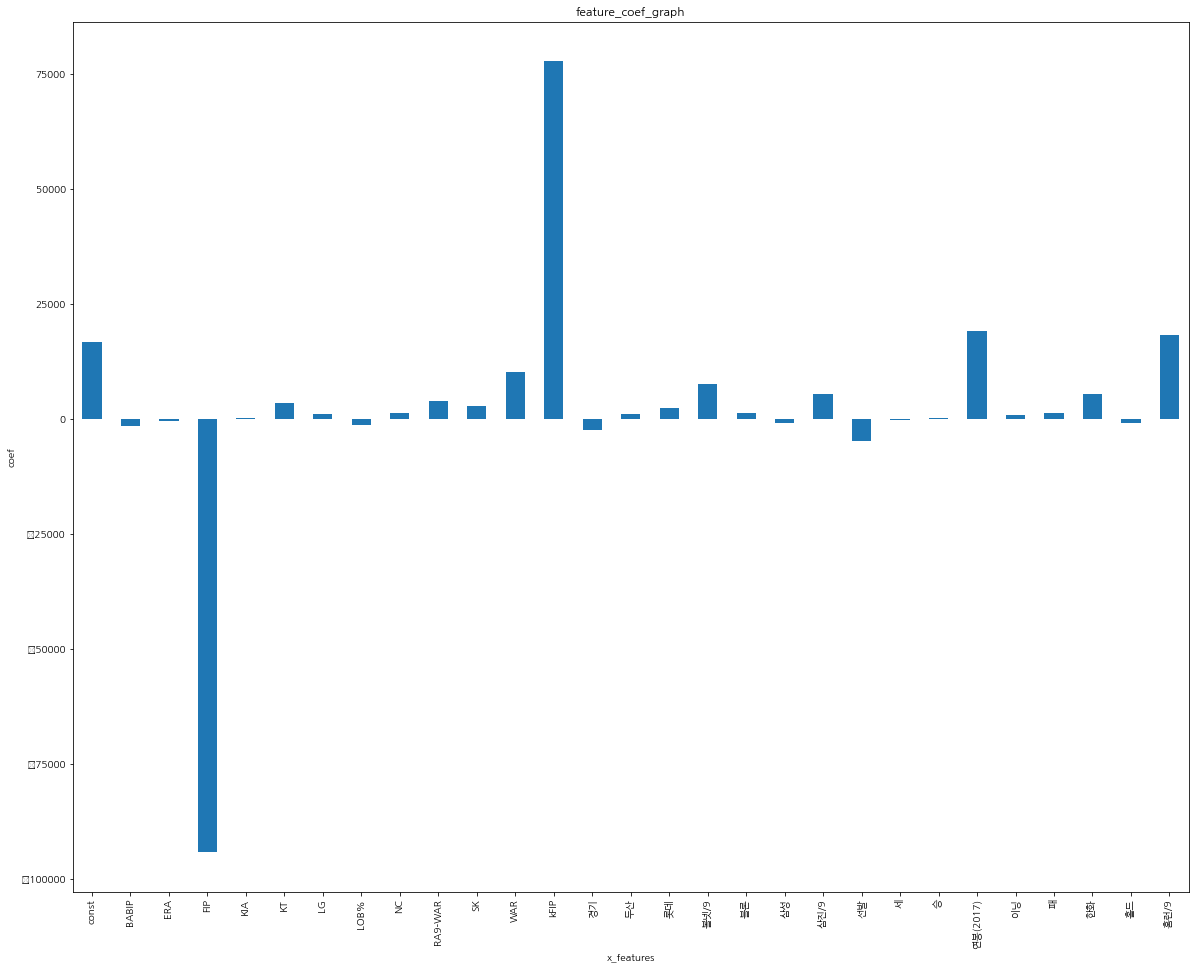

In [16]:
'''
F 통계량(F-statistic): 회귀식의 유의성 검정에 사용되는 값으로 p-value 인 Prob(F-statistic) 수치와 함께 살펴봐야한다.
일반적으로 p-value가 0.05이하면 F 통계량이 유의한 의미를 가진다.
P > |t|(검정 통계량(t-statisic)): 얼마나 유의미한지에 대한 p-value를 나타내는 정보
'''

# 한글출력을 위한 사전 설정 단계입니다.
font_fname = 'C:/Users/USER/anaconda3/envs/pybook/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

#회귀 계수를 리스트로 반환합니다.
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트로 반환합니다.
x_labels = model.params.index.tolist()

#회귀 계수를 출력합니다.
ax = coefs_series.plot(kind = 'bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

In [17]:
'''예측 모델의 평가'''
# 학습데이터와 테스트 데이터로 분리합니다.
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
# print(X.head())
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 19)

#회귀 분석 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

'''R2 score'''
#회귀 분석 모델을 평가합니다.
print(model.score(X_train, y_train))    # train R2 score를 출력합니다.
print(model.score(X_test, y_test))    # test R2 score를 출력합니다.

0.9276949405576705
0.8860171644977818


In [18]:
'''RMSE score(Root mean square Error)'''

#회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions)))    # train RMSE score를 출력합니다
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))    # test RMSE score를 출력합니다


7282.718684746374
14310.696436889131


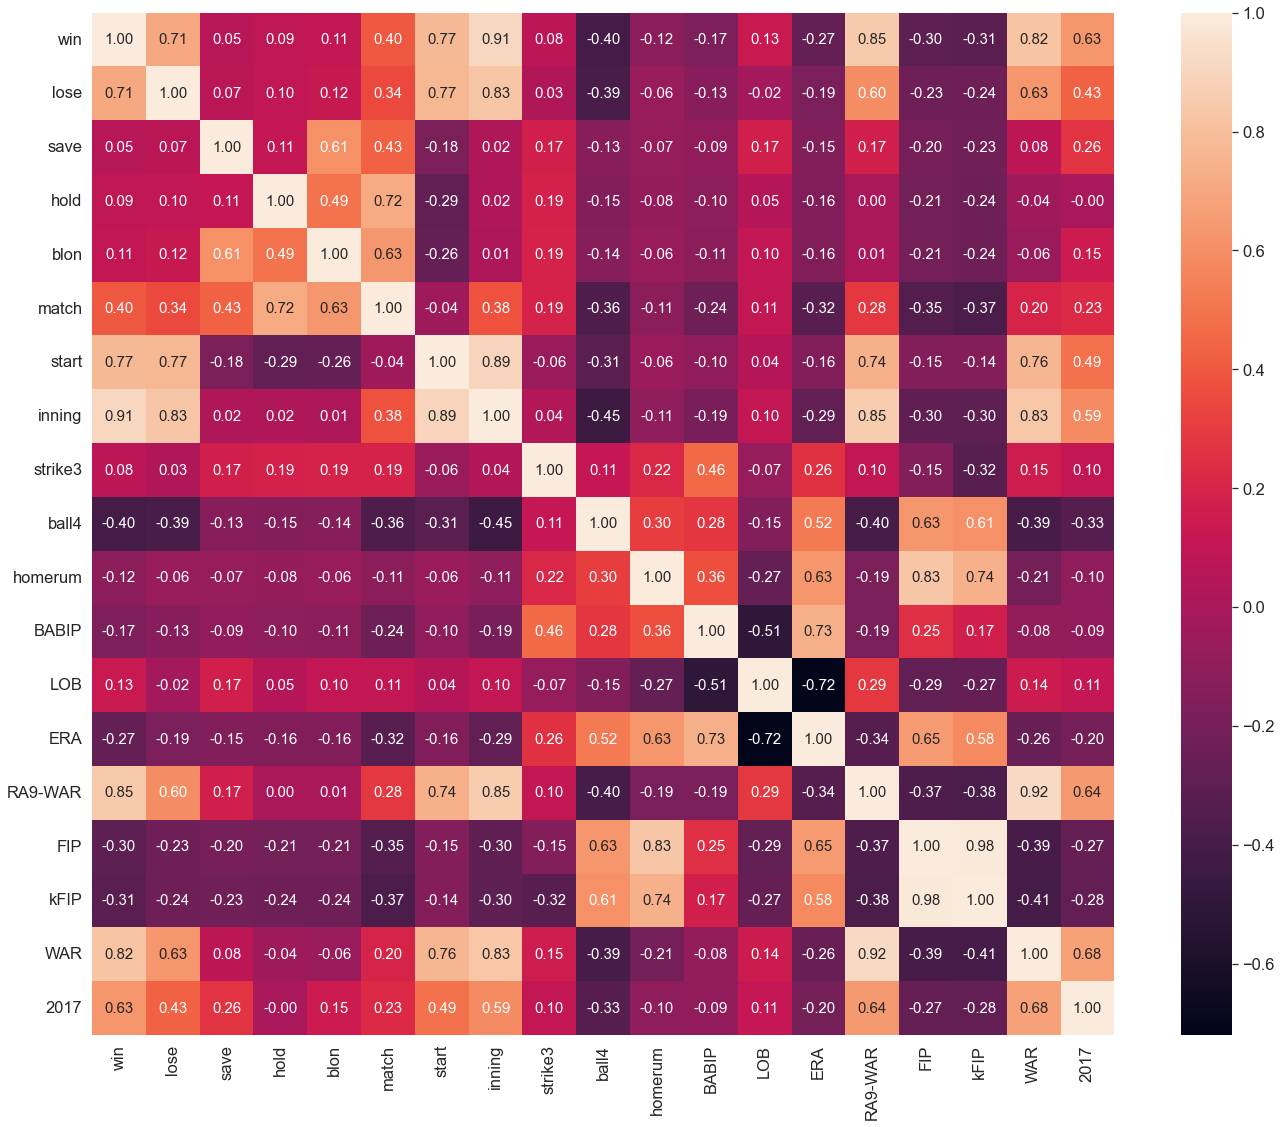

In [19]:
'''피처들의 상관관계 분석'''
import seaborn as sns

#피처간의 상관계수 행렬을 계산합니다.
corr = picher_df[scale_columns].corr(method = 'pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 'inning', 'strike3',
            'ball4', 'homerum', 'BABIP', 'LOB', 'ERA', 'RA9-WAR', 'FIP', 'kFIP','WAR','2017']

#corr 행렬 히트맵을 시각화 합니다.
plt.rcParams["font.family"] = font_family
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size':15},
                yticklabels = show_cols,
                xticklabels = show_cols)
plt.tight_layout()
plt.show()

In [20]:
'''회귀 분석 예측 성능을 높이기 위한 방법: 다중공선성 확인'''
'''
회귀 분석은 피처간의 독립성을 전체로 하는 분석 방법
올바른 회귀 분석을하려면 이러한 피처 쌍을 제거해야한다.

다중공선성: 변수간 상관관계가 높아 분석에 부정적인 영향을 미치는 것

분산팽창요인 VIF(Variance Inflation Factor): 일반적으로 VIF 계수가 10~15 정도를 넘으면 그피처는 다중 공선성의 문제가 발생했다고 판단
'''

from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK


In [25]:
# '''시각화 : 분석 결과의 시각화(예상 연봉과 실제 연봉 비교)'''

# # 2018년 연봉을 예측하여 데이터프레임의 column으로 생성합니다.
X = picher_df[['FIP', 'WAR','볼넷/9','삼진/9','연봉(2017)']]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 19)

#회귀 분석 모델을 학습합니다.
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
predict_2018_salary = lr.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)


In [29]:
# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
result_df = picher_df.sort_values(by = ['y'], ascending = False)
result_df.drop(['연봉(2017)'], axis = 1, inplace = True, errors = 'ignore')
result_df = result_df.merge(picher, on = ['선수명'], how = 'left')
result_df = result_df[['선수명','y','예측연봉(2018)','연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰합니다.
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,양현종,230000,163930.148696,5.329881
1,1,켈리,140000,120122.822204,2.734705
2,2,소사,120000,88127.019455,1.337303
3,3,정우람,120000,108489.464585,4.132107
4,4,레일리,111000,102253.697589,2.734705
5,5,차우찬,100000,116009.684582,3.333592
6,6,장원준,100000,110139.334841,3.333592
7,7,피어밴드,85000,58975.725734,0.738417
8,8,윤성환,80000,87453.777232,2.535076
9,9,우규민,70000,72214.641606,2.135819
